In [15]:
import pandas as pd
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/Raotbl6.csv'
df_comp = pd.read_csv(filepath, parse_dates=['date'], index_col='date')
print(df_comp.shape)  # (123, 8)
df_comp.head()

(123, 8)


,rgnp,pgnp,ulc,gdfco,gdf,gdfim,gdfcf,gdfce
date,,,,,,,,
1959-01-01,1606.4,1608.3,47.5,36.9,37.4,26.9,32.3,23.1
1959-04-01,1637.0,1622.2,47.5,37.4,37.5,27.0,32.2,23.4
1959-07-01,1629.5,1636.2,48.7,37.6,37.6,27.1,32.4,23.4
1959-10-01,1643.4,1650.3,48.8,37.7,37.8,27.1,32.5,23.8
1960-01-01,1671.6,1664.6,49.1,37.8,37.8,27.2,32.4,23.8


In [2]:
dat=df_comp['gdfim']
dat.head()

date
1959-01-01    26.9
1959-04-01    27.0
1959-07-01    27.1
1959-10-01    27.1
1960-01-01    27.2
Name: gdfim, dtype: float64

In [3]:
import statsmodels.tsa.stattools as sts
result = sts.adfuller(dat)
print('p-value: %f' % result[1])

p-value: 0.938674


In [16]:
dat_transformed=dat.diff().dropna()
dat_transformed.head()

date
1959-04-01    0.1
1959-07-01    0.1
1959-10-01    0.0
1960-01-01    0.1
1960-04-01    0.2
Name: gdfim, dtype: float64

In [5]:
result = sts.adfuller(dat_transformed)
print('p-value: %f' % result[1])

p-value: 0.000554


In [6]:
!pip install pmdarima
from pmdarima.arima import auto_arima


In [7]:
model_auto = auto_arima(dat_transformed,d=0)

In [8]:
model_auto

ARIMA(order=(1, 0, 0), scoring_args={}, suppress_warnings=True)

In [9]:
pred=model_auto.predict(n_periods = 10)
df_auto_pred = pd.DataFrame(pred)

In [10]:
df_forecast= dat.iloc[-1] + df_auto_pred.cumsum()

<Axes: >

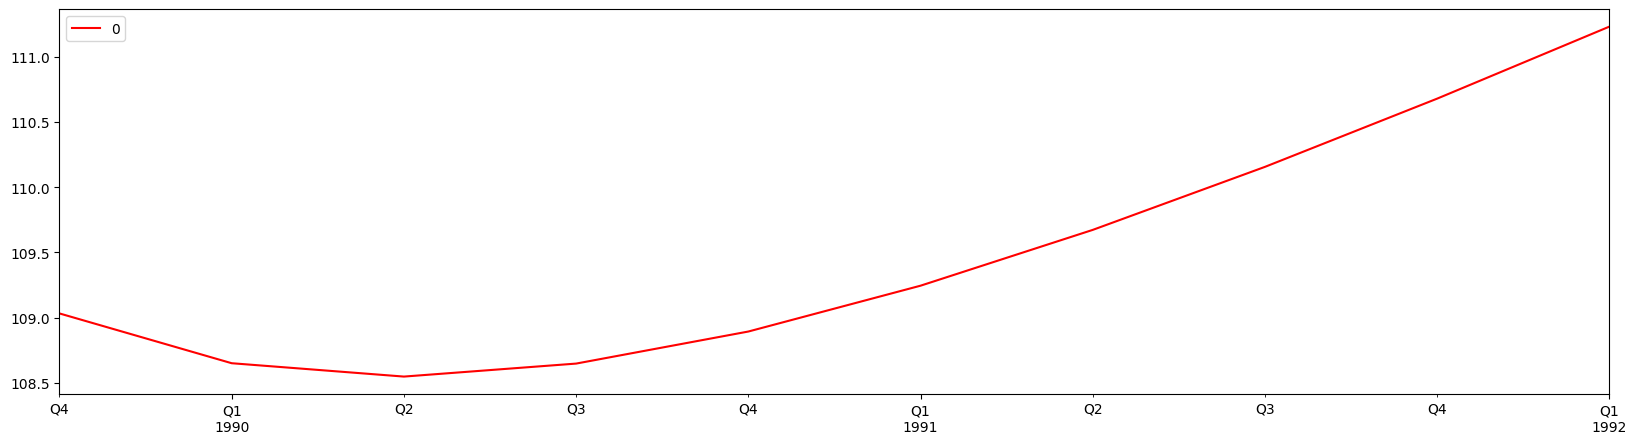

In [11]:
df_forecast.plot(figsize = (20,5), color = "red")

In [12]:
dates=pd.date_range(start="1989-10-01",freq='QS',periods=10)
dates

DatetimeIndex(['1989-10-01', '1990-01-01', '1990-04-01', '1990-07-01',
               '1990-10-01', '1991-01-01', '1991-04-01', '1991-07-01',
               '1991-10-01', '1992-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [13]:
df_forecast.index=dates
df_forecast.columns=['Predictions']
df_forecast.head()

,Predictions
1989-10-01,109.033172
1990-01-01,108.651989
1990-04-01,108.549744
1990-07-01,108.649255
1990-10-01,108.894696


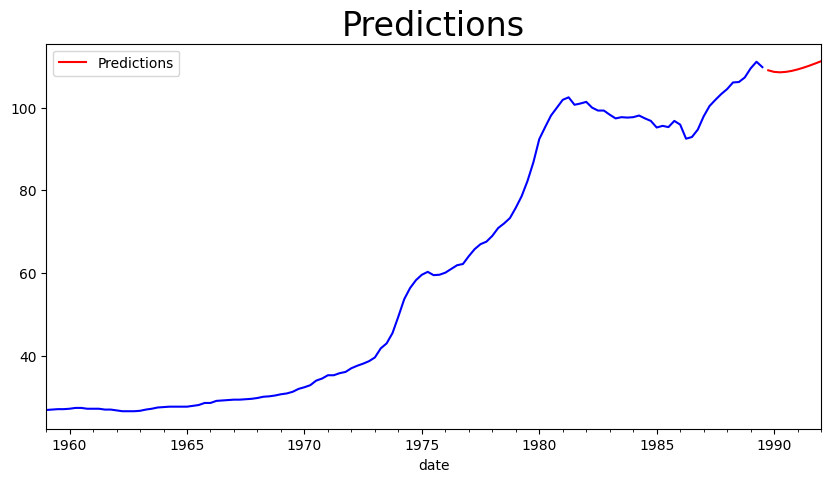

In [14]:
import matplotlib.pyplot as plt

df_forecast.plot(figsize = (10,5), color = "red")
dat.plot(color = "blue")
plt.title("Predictions", size = 24)
plt.show()